In [1]:
import numpy as np
import pandas as pd

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
import scipy.stats as stats

In [7]:
np.random.binomial(1, 0.5)

1

In [33]:
np.random.binomial(1000, 0.5)

531

In [48]:
n = np.random.binomial(20, .5, 10000)
(n>=15).mean()

0.0218

In [120]:
np.random.binomial(10, 1/6, 10000).mean()

1.6659

In [121]:
10/6

1.6666666666666667

In [133]:
x = np.random.normal(5, 2, size = 10000)

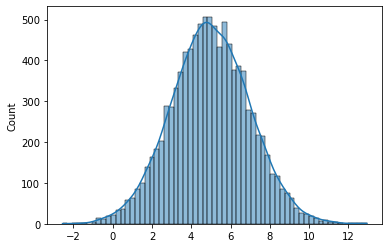

In [140]:
sns.distplot(x, kde = True, fill = True)

In [137]:
stats.skew(x)

0.0313288290263335